In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [18]:
df=pd.read_csv(r'../Datasets/concrete_data.csv')

df.head()

,Unnamed: 0,Cement,BFS,Fly Ash,Water,Superplasticizer,Coarage Aggregator,Fine Aggregator,Age,Strength
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [19]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [20]:
x.head()

,Cement,BFS,Fly Ash,Water,Superplasticizer,Coarage Aggregator,Fine Aggregator,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [21]:
y.head()


0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Strength, dtype: float64

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=27)

In [23]:
model=LinearRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("R2 score without transformation:",r2_score(y_test,y_pred))

R2 score without transformation: 0.5756557484734178


In [24]:
print("R2 score after applying cross validation:",np.mean(cross_val_score(model,x,y,scoring='r2',cv=10)))

R2 score after applying cross validation: 0.2780755819787802


In [26]:
x.describe()

,Cement,BFS,Fly Ash,Water,Superplasticizer,Coarage Aggregator,Fine Aggregator,Age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


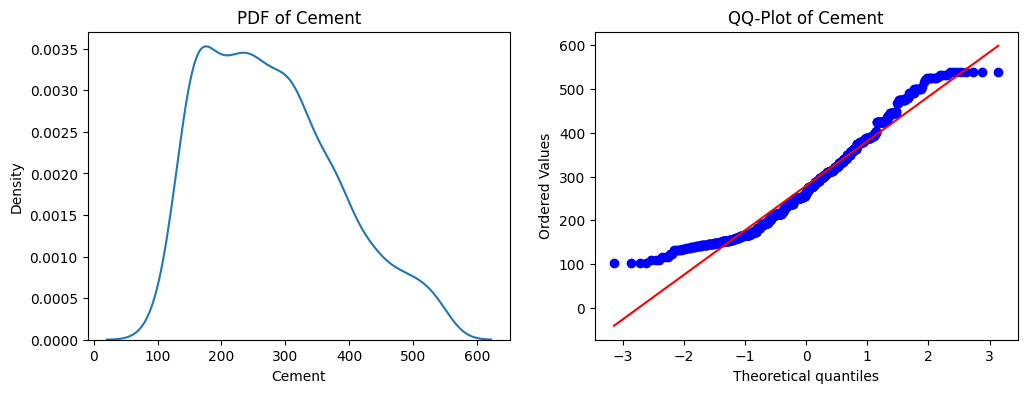

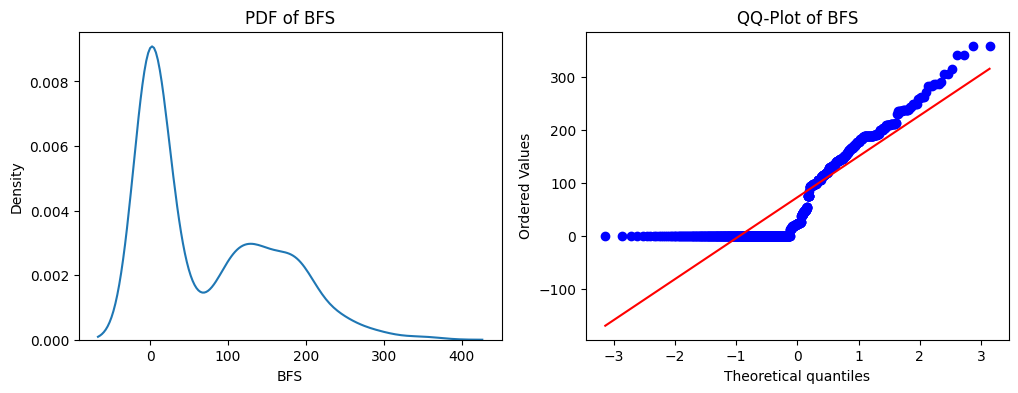

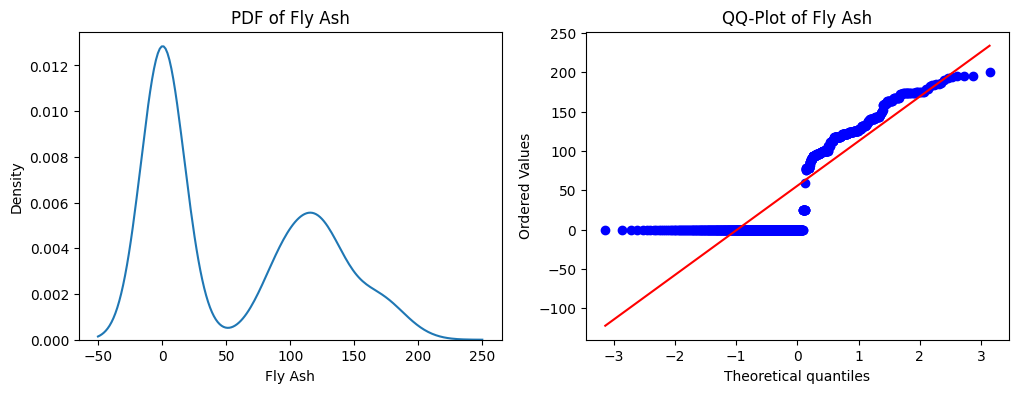

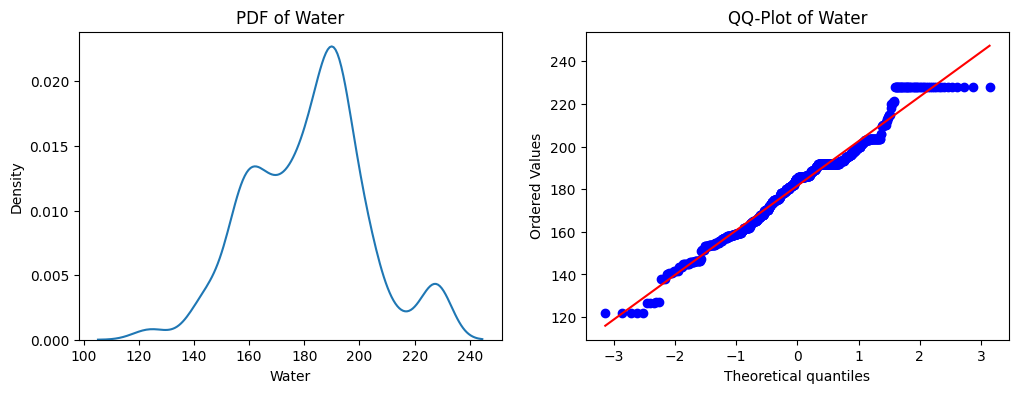

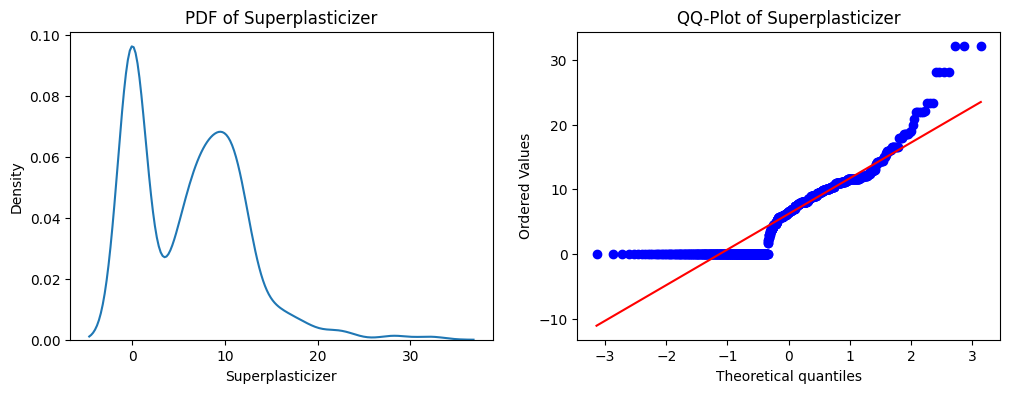

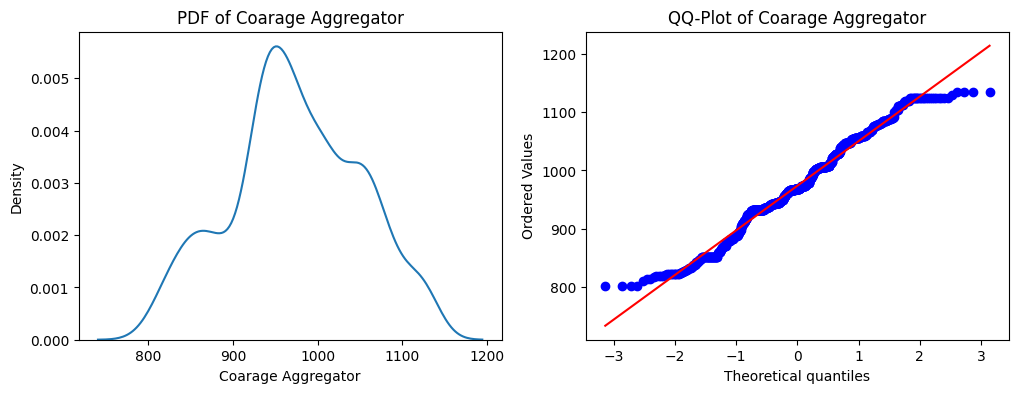

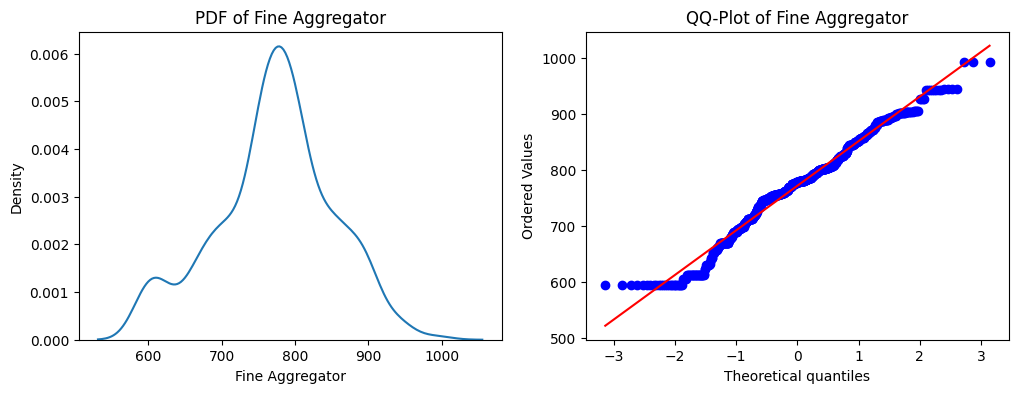

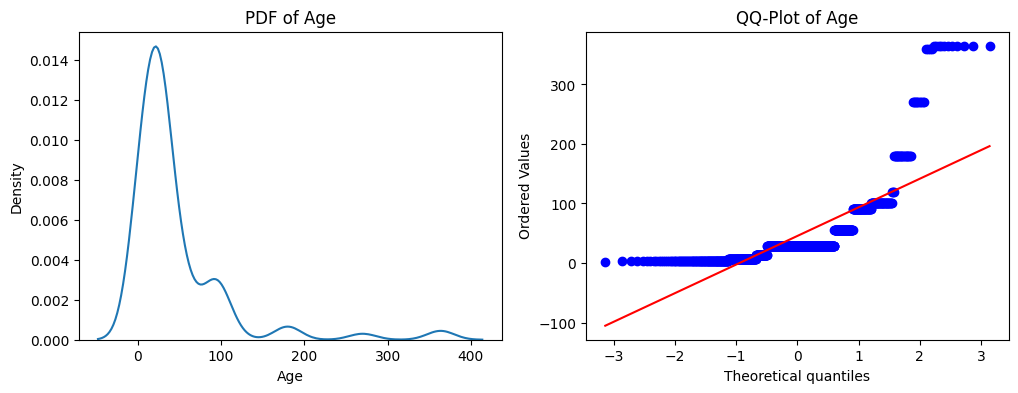

In [28]:
for col in x_train.columns:
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))

    
    sns.kdeplot(data=x_train,x=col,ax=ax1)
    ax1.set_title(f"PDF of {col}")

    
    stats.probplot(x_train[col],dist='norm',plot=ax2)
    ax2.set_title(f'QQ-Plot of {col}')
    plt.show()

In [ ]:
pt_trns=PowerTransformer(method='box-cox')  ## default standardization

x_train_trans=pt_trns.fit_transform(x_train+0.000001)
x_test_trans=pt_trns.transform(x_test+0.000001)

pd.DataFrame({'cols':x_train.columns,'box-cox value':pt_trns.lambdas_})

,cols,box-cox value
0,Cement,0.123673
1,BFS,0.030060
2,Fly Ash,-0.023074
3,Water,0.912892
4,Superplasticizer,0.101139
5,Coarage Aggregator,1.131777
6,Fine Aggregator,1.722138
7,Age,0.052281


In [31]:
lr_model=LinearRegression()

lr_model.fit(x_train_trans,y_train)

y_pred=lr_model.predict(x_test_trans)

print("R2 score after transformation:",r2_score(y_test,y_pred))

R2 score after transformation: 0.8161363760997927


In [34]:
pt=PowerTransformer(method='box-cox')  ## default standardization
x_trans=pt_trns.fit_transform(x+0.000001)

lr=LinearRegression()

print("With cross validation:",np.mean(cross_val_score(lr,x_trans,y,scoring='r2')))

With cross validation: 0.6688624211073305


In [32]:
x_train_trans=pd.DataFrame(x_train_trans,columns=x_train.columns)

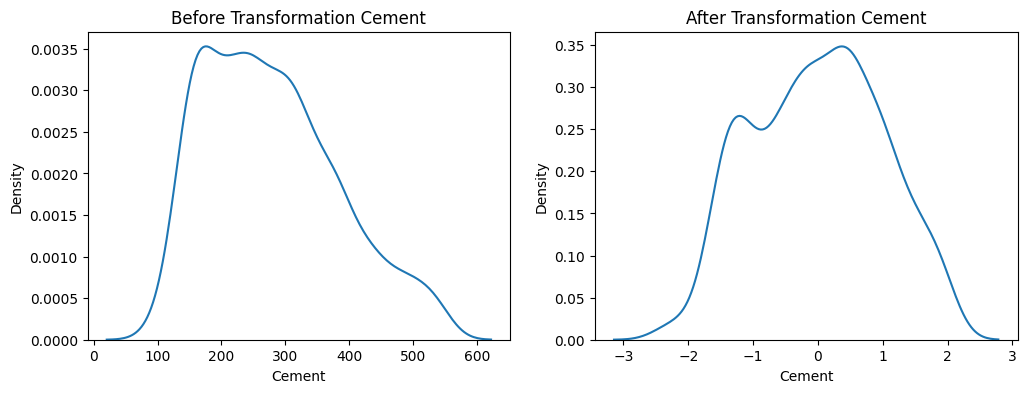

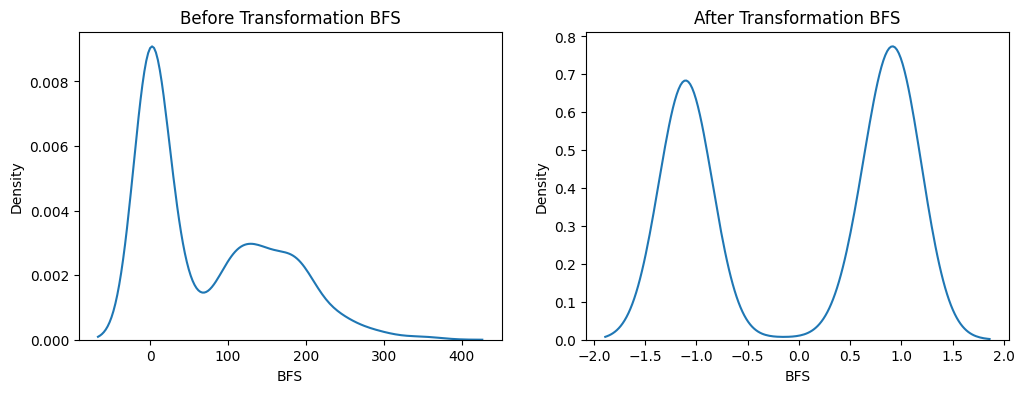

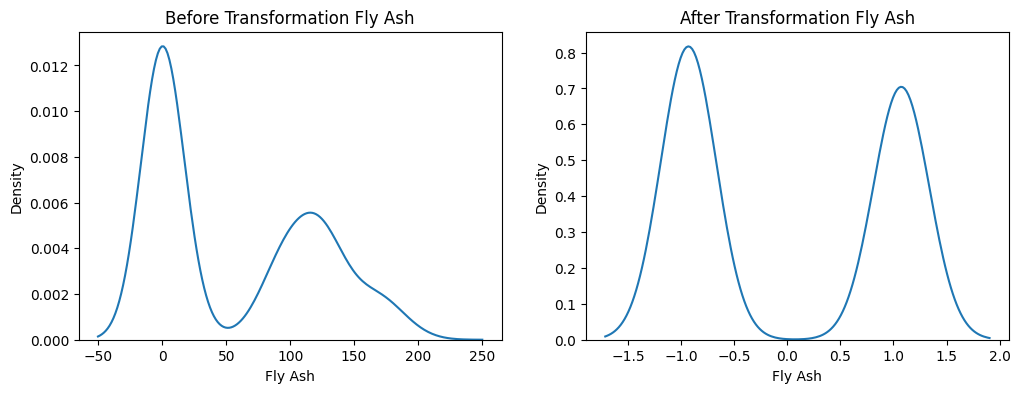

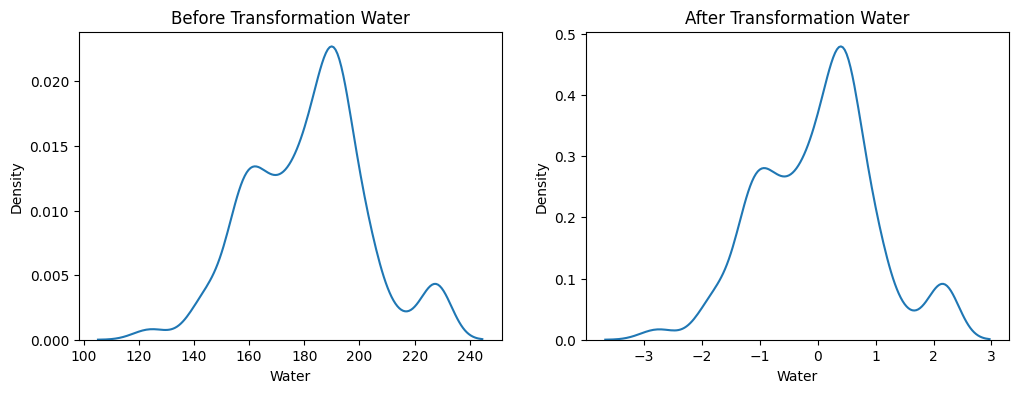

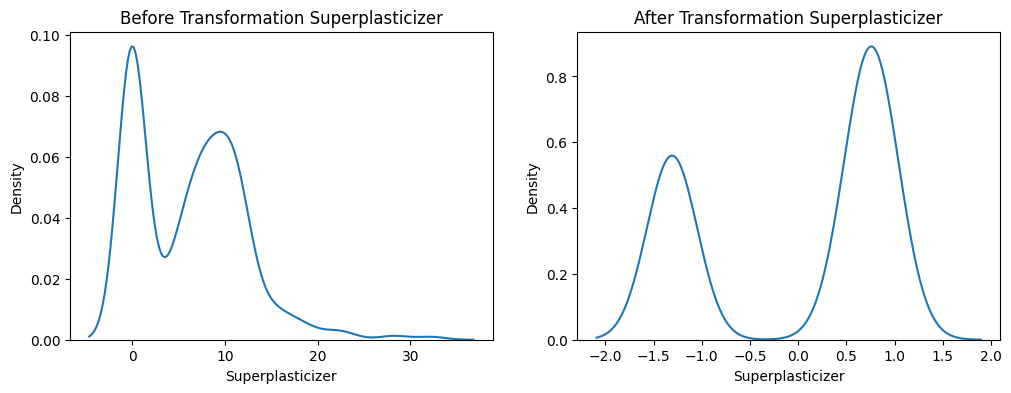

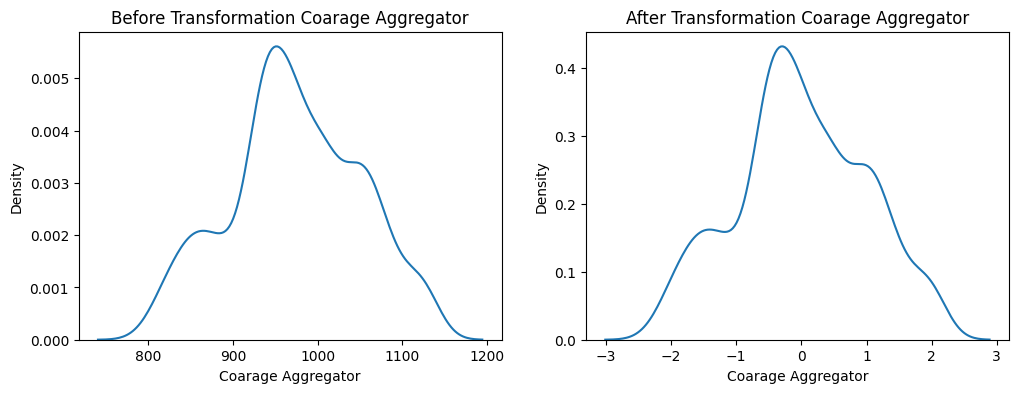

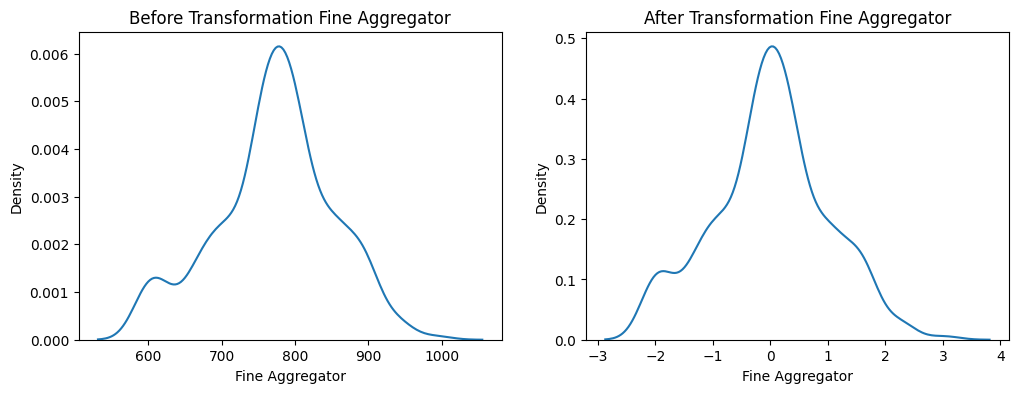

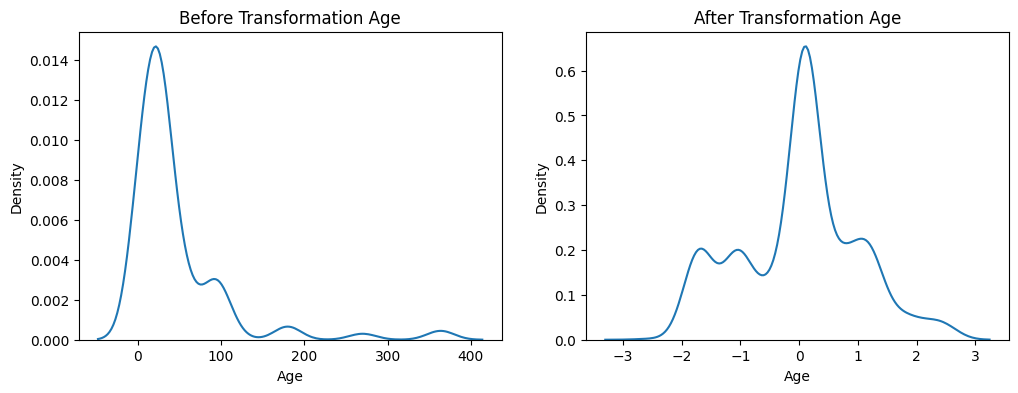

In [33]:
for col in x_train.columns:
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))

    
    sns.kdeplot(data=x_train,x=col,ax=ax1)
    ax1.set_title(f"Before Transformation {col}")

    sns.kdeplot(data=x_train_trans,x=col,ax=ax2)
    ax2.set_title(f"After Transformation {col}")

    plt.show()

### Yen-Jhonson transformer

In [35]:
pt_trns2=PowerTransformer()  ## default standardization

x_train_trans2=pt_trns2.fit_transform(x_train+0.000001)
x_test_trans2=pt_trns2.transform(x_test+0.000001)

pd.DataFrame({'cols':x_train.columns,'Yen-Jhonson value':pt_trns.lambdas_})

,cols,Yen-Jhonson value
0,Cement,0.172204
1,BFS,0.026801
2,Fly Ash,-0.032412
3,Water,0.810542
4,Superplasticizer,0.099713
5,Coarage Aggregator,1.129097
6,Fine Aggregator,1.829523
7,Age,0.048975


In [36]:
lr_model2=LinearRegression()

lr_model2.fit(x_train_trans2,y_train)

y_pred2=lr_model2.predict(x_test_trans2)

print("R2 score after Yen-Jhon transformation:",r2_score(y_test,y_pred2))

R2 score after Yen-Jhon transformation: 0.81391498232782


In [37]:
pt=PowerTransformer()  ## default standardization
x_trans=pt_trns.fit_transform(x+0.000001)

lr=LinearRegression()

print("With cross validation:",np.mean(cross_val_score(lr,x_trans,y,scoring='r2')))

With cross validation: 0.6688624211073305


In [39]:
x_train_trans2=pd.DataFrame(x_train_trans2,columns=x_train.columns)

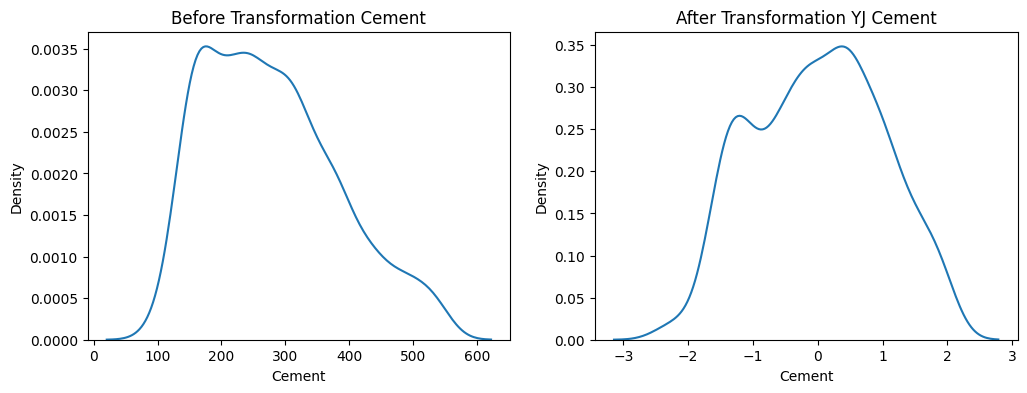

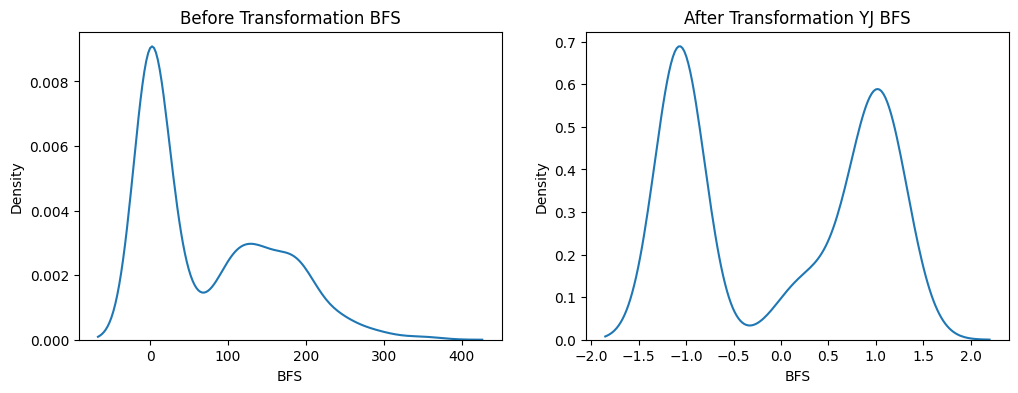

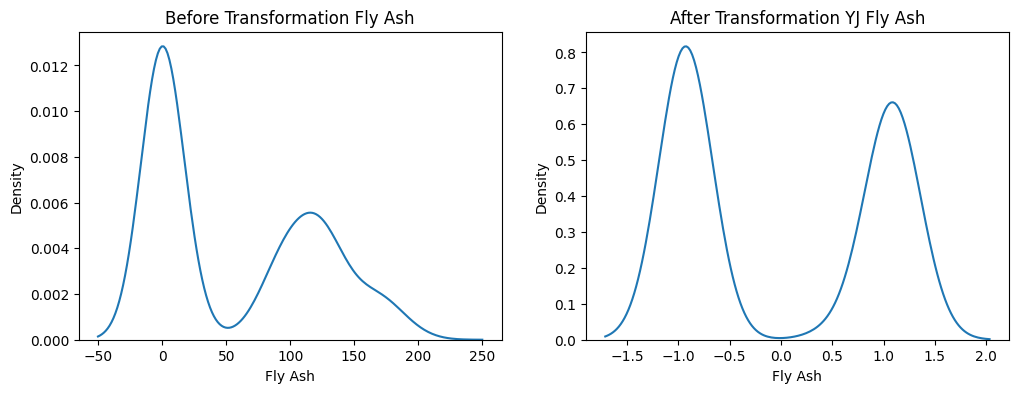

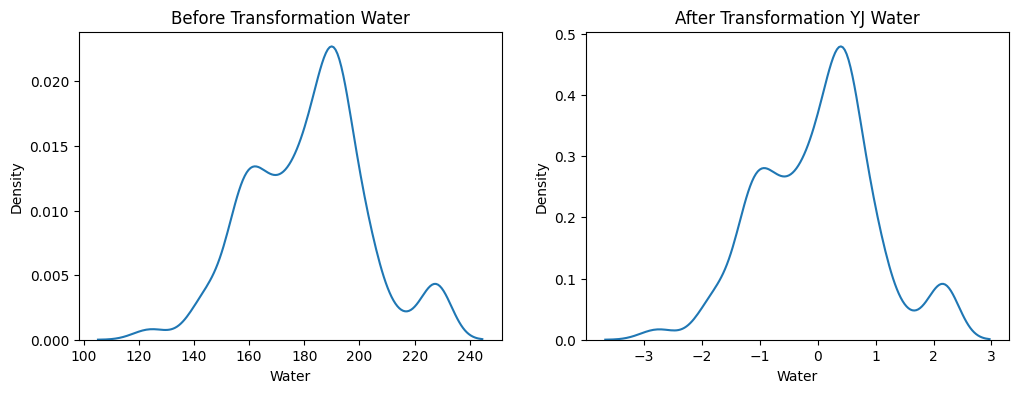

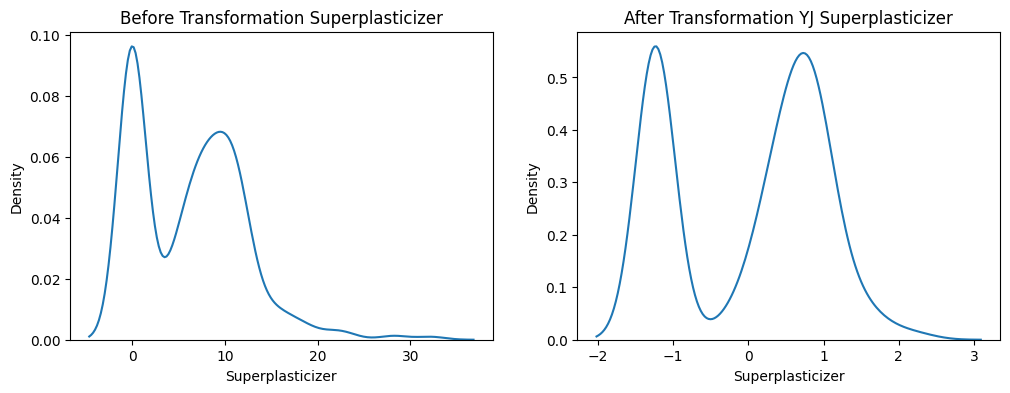

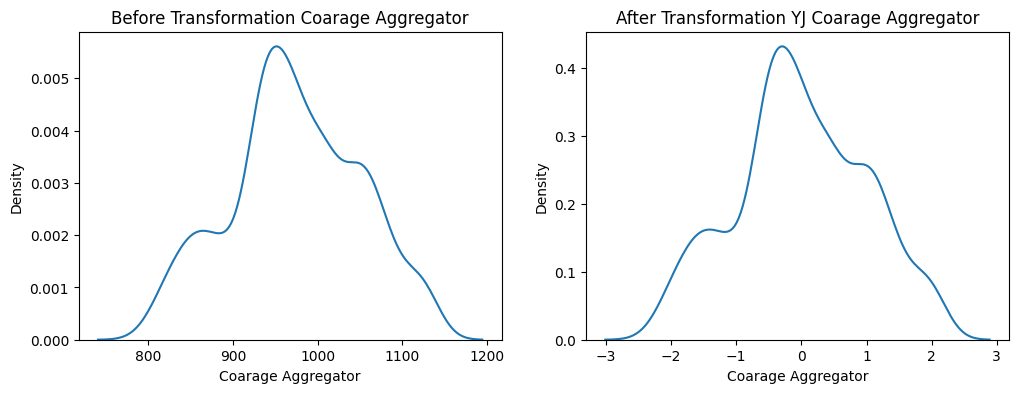

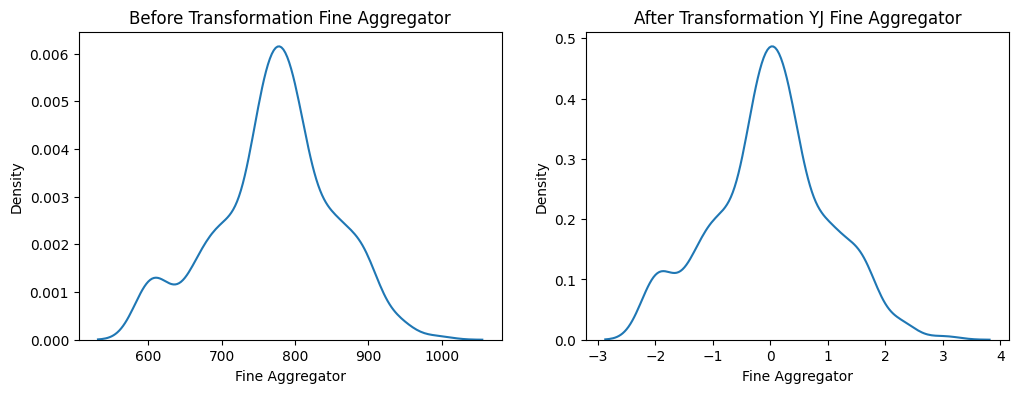

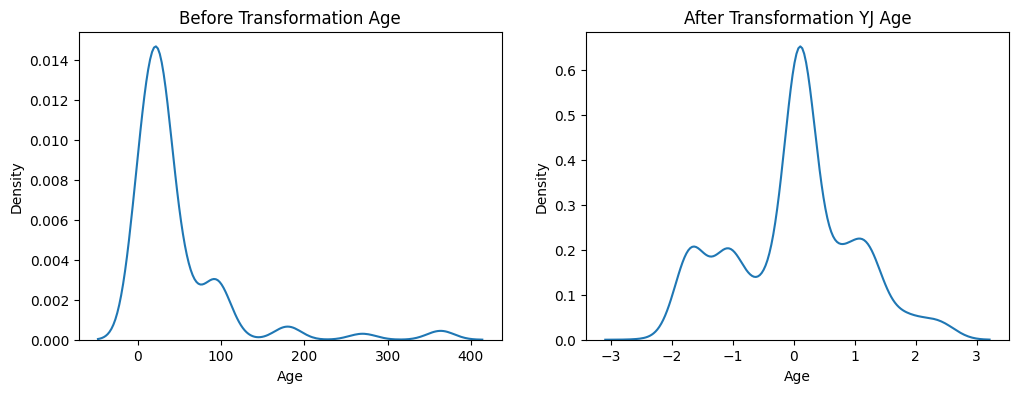

In [40]:
for col in x_train.columns:
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))

    
    sns.kdeplot(data=x_train,x=col,ax=ax1)
    ax1.set_title(f"Before Transformation {col}")

    sns.kdeplot(data=x_train_trans2,x=col,ax=ax2)
    ax2.set_title(f"After Transformation YJ {col}")

    plt.show()